In [1]:
# relu
def relu(x):
    return np.where(x>0,x,0)

In [27]:
# softmax
def softmax(x):
    x = x-np.max(x,axis=1).reshape(-1,1)
    return np.exp(x)/np.sum(np.exp(x),axis=1).reshape(-1,1)

In [177]:
#loss function
# cross entropy
def cross_entropy(y,t):
    delta = 1e-8
    return -np.sum(t*np.log(y + delta))

In [16]:
# one_hot
def make_one(x):
    t = np.zeros((x.size,np.unique(x).size))
    for i in range(t.shape[0]):
        t[i,x[i]] = 1
    return t

In [13]:
def gradient(f,x):
    #f : loss function
    h = 1e-5
    
    fx = f(x)
    fxh = f(x+h)
    
    dw  = (fxh - fx)/h
    
    return dw
    

In [48]:
def numerical_gradient(f,x):
    h = 1e-5
    dw = np.zeros_like(x)
    if x.ndim == 1:
        for i in range(x.size):
            fx = f(x)
            tmp_val = x[i]
            x[i] = tmp_val + h
            fxh = f(x)
            dw[i] = (fxh - fx)/h
            x[i] = tmp_val
    else:
        for i in range(x.shape[0]):
            for j in range(x.shape[1]):
                fx = f(x)

                tmp_val = x[i,j]
                x[i,j] = tmp_val + h
                fxh = f(x)

                dw[i,j] = (fxh - fx)/h
                x[i,j] = tmp_val
    return dw

In [28]:
import numpy as np

x = np.random.randn(2,3)
W = np.random.randn(3,2)
b = np.random.rand(2)
t = np.zeros((2,2))
t[0,0] = 1
t[1,1] = 1

def f(x):
    y = np.dot(x,W) + b
    y = softmax(y)
    return cross_entropy(y,t)


gradient(f,x)

array([[-0.991732  , -0.07675416,  1.54978674],
       [ 0.90439694,  0.0699948 , -1.41329915]])

In [9]:
from sklearn.datasets import load_iris

X = load_iris()['data']
y = load_iris()['target']

print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [17]:
y = make_one(y)
print(y.shape)

(150, 3)


In [30]:
W1 = np.random.randn(4,5)
b1 = np.random.randn(5)
W2 = np.random.randn(5,3)
b2 = np.random.randn(3)

In [31]:
l1=np.dot(X,W1) + b1
z1 = relu(l1)

l2 = np.dot(z1,W2) + b2

cross_entropy(softmax(l2),y)

def f(x):
    y_hat=softmax(l2)
    return cross_entropy(y_hat,y)


In [34]:
grads = gradient(f,W1)
grads

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [104]:
class TwoLayer:
    #input_size
    #output_size
    #hidden = 2
    def __init__(self,input_size,hidden_size,output_size):
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size = hidden_size
        self.W = {}
        self.W['W1'] = np.random.randn(input_size,hidden_size)
        self.W['b1'] = np.random.randn(hidden_size)
        self.W['W2'] = np.random.randn(hidden_size,output_size)
        self.W['b2'] = np.random.randn(output_size)
        self.loss_val = []
        
    def predict(self,x):
        l1 = np.dot(x,self.W['W1']) + self.W['b1']
        z1 = relu(l1)
        
        l2 = np.dot(z1,self.W['W2']) + self.W['b2']
        out = softmax(l2)
        return out
    
    def loss(self,x,t):
        y = self.predict(x)
        return cross_entropy(y,t)
    
    def gradient(self,x,t):
        W1 = self.W['W1']
        W2 = self.W['W2']
        b1 = self.W['b1']
        b2 = self.W['b2']
        grads = {}
        f = lambda W : self.loss(x,t)
        grads['W1']=numerical_gradient(f,W1)
        grads['W2']=numerical_gradient(f,W2)
        grads['b1']=numerical_gradient(f,b1)
        grads['b2']=numerical_gradient(f,b2)
        return grads
    
    def acc(self,x,t):
        y = np.argmax(self.predict(x),axis=1) #가장 큰 값의 index return
        #2차원일 경우 정확한 index가 나오지 않는다.
        # 행에 대해서 적용을 시켜야한다. => axis=1
        t = np.argmax(t,axis=1)
        return np.sum(y == t) / t.shape[0] #true일때 1 이므로 맞은 갯수 / 전체갯수
        
        
    def fit(self,epochs,lr,x,t):
        for epoch in range(epochs):
            grads = self.gradient(x,t)
            self.W['W1'] -=lr * grads['W1']
            self.W['W2'] -=lr * grads['W2']
            self.W['b1'] -=lr * grads['b1']
            self.W['b2'] -=lr * grads['b2']
            print('='*10)
            print(f'{epoch+1} complete\n// loss = {self.loss(x,t)} // accuracy = {self.acc(x,t)}')
            self.loss_val.append(self.loss(x,t))
            print('='*10)
        
        

In [61]:
X.shape

(150, 4)
(150, 3)


In [105]:
input_size = X.shape[1]
output_size = y.shape[1]
hidden_size = 32

net = TwoLayer(input_size=input_size,hidden_size=hidden_size,output_size=output_size)


In [75]:
net.W

{'W1': array([[ 1.31839194, -0.86734388,  1.0858145 ,  1.58478083, -0.3237671 ],
        [ 1.29460178, -0.41925665,  1.84479156, -2.76497626, -0.74973795],
        [-1.00264103, -0.88972873,  1.23782039, -1.45445891, -2.30658077],
        [-0.10980856, -0.23922284,  0.86594832,  0.77997544, -0.52015787]]),
 'b1': array([-0.67651606, -1.3208794 , -1.74890884, -1.02481175,  0.27703299]),
 'W2': array([[ 0.96096453, -0.14816041,  0.69930917],
        [-0.81400258, -1.00370854, -1.46333389],
        [ 0.26062918,  0.46209866,  0.44629688],
        [-0.03919701,  0.41191502, -0.01160687],
        [-0.78184344,  0.3043409 ,  1.31505376]]),
 'b2': array([ 0.29162435, -0.50957616, -0.166485  ])}

In [76]:
net.loss(X,y)

322.276910424835

In [82]:
lr = 1e-3
epochs = 20
for epoch in range(epochs):
    net.W['W1'] = net.W['W1'] - lr*net.gradient(X,y)['W1']
    net.W['W2'] = net.W['W2'] - lr*net.gradient(X,y)['W2']
    net.W['b1'] = net.W['b1'] - lr*net.gradient(X,y)['b1']
    net.W['b2'] = net.W['b2'] - lr*net.gradient(X,y)['b2']
    print(f'{i+1} epoch complete')

In [83]:
net.loss(X,y)

61.930371703686305

In [106]:
epochs = 1000
lr = 1e-3
net.fit(epochs,lr,X,y)

1 complete
// loss = 12897.751732212946 // accuracy = 0.6666666666666666
2 complete
// loss = 7330.949642703827 // accuracy = 0.3333333333333333
3 complete
// loss = 2919.204097964238 // accuracy = 0.3333333333333333
4 complete
// loss = 109.56106553896393 // accuracy = 0.6666666666666666
5 complete
// loss = 72.7318392252966 // accuracy = 0.6933333333333334
6 complete
// loss = 62.41569301275467 // accuracy = 0.84
7 complete
// loss = 57.10965348292399 // accuracy = 0.8666666666666667
8 complete
// loss = 53.63773797101082 // accuracy = 0.88
9 complete
// loss = 51.1726918944719 // accuracy = 0.8866666666666667
10 complete
// loss = 49.128113720807505 // accuracy = 0.9133333333333333
11 complete
// loss = 47.33799380523115 // accuracy = 0.92
12 complete
// loss = 45.74499635196017 // accuracy = 0.92
13 complete
// loss = 44.27851433447846 // accuracy = 0.92
14 complete
// loss = 42.936836985748194 // accuracy = 0.9266666666666666
15 complete
// loss = 41.698271041303606 // accuracy = 

In [98]:
net.acc(X,y)

0.98

In [102]:
print(X[3])
print(y[3])
print(load_iris()['target'][3])

[4.6 3.1 1.5 0.2]
[1. 0. 0.]
0


In [103]:
np.argmax(net.predict(X[[3],:]))

0

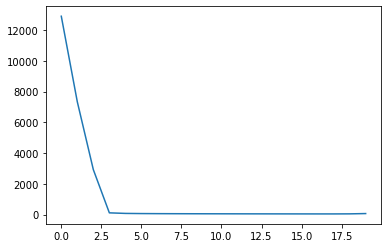

In [114]:
import matplotlib.pyplot as plt

plt.plot(range(20),net.loss_val[:20])

In [158]:
class Layer:
    #input_size
    #output_size
    #hidden = 2
    def __init__(self,layer,input_size,hidden_size,output_size):
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size = hidden_size
        self.layer = layer
        self.W = {}
        hidden = self.hidden_size[0]
        self.W['W1'] = np.random.randn(input_size,hidden)
        self.W['b1'] = np.random.randn(hidden)
        for i in range(1,layer-1):
            tmp_W = 'W'+str(i+1)
            tmp_b = 'b'+str(i+1)
            hidden0 = self.hidden_size[i-1]
            hidden1 = self.hidden_size[i]
            self.W[tmp_W] = np.random.randn(hidden0,hidden1)
            self.W[tmp_b] = np.random.randn(hidden1)
            del tmp_W
            del tmp_b
            
        self.W['W'+str(layer)] = np.random.randn(self.hidden_size.pop(),output_size)
        self.W['b'+str(layer)] = np.random.randn(output_size)
            
#         self.W['W1'] = np.random.randn(input_size,hidden_size)
#         self.W['b1'] = np.random.randn(hidden_size)
#         self.W['W2'] = np.random.randn(hidden_size,output_size)
#         self.W['b2'] = np.random.randn(output_size)
        self.loss_val = []
        
    def predict(self,x):
        l1 = np.dot(x,self.W['W1']) + self.W['b1']
        z1 = relu(l1)
        
        l2 = np.dot(z1,self.W['W2']) + self.W['b2']
        out = softmax(l2)
        return out
    
    def loss(self,x,t):
        y = self.predict(x)
        return cross_entropy(y,t)
    
    def gradient(self,x,t):
        f = lambda W : self.loss(x,t)
        grads = {}
        
        for k,v in self.W.items():
            grads[k]=numerical_gradient(f,v)
        
        return grads
    
    def acc(self,x,t):
        y = np.argmax(self.predict(x),axis=1) #가장 큰 값의 index return
        #2차원일 경우 정확한 index가 나오지 않는다.
        # 행에 대해서 적용을 시켜야한다. => axis=1
        t = np.argmax(t,axis=1)
        return np.sum(y == t) / t.shape[0] #true일때 1 이므로 맞은 갯수 / 전체갯수
        
        
    def fit(self,epochs,lr,x,t):
        for epoch in range(epochs):
            grads = self.gradient(x,t)
            for k,v in self.W.items():
                self.W[k]  -= lr * grads[k]
                
#             self.W['W1'] -=lr * grads['W1']
#             self.W['W2'] -=lr * grads['W2']
#             self.W['b1'] -=lr * grads['b1']
#             self.W['b2'] -=lr * grads['b2']
            print('='*10)
            print(f'{epoch+1} complete\n// loss = {self.loss(x,t)} // accuracy = {self.acc(x,t)}')
            self.loss_val.append(self.loss(x,t))
            print('='*10)

In [159]:
input_size = X.shape[1]
hidden_size = [32]
output_size = y.shape[1]
layer=2

net = Layer(layer=2,input_size=input_size,hidden_size=hidden_size,output_size = output_size)

In [160]:
net.fit(epochs=100,lr=1e-3,x=X,t=y)

/var/folders/my/lj1l_34s0hs5sp6zrt4030wm0000gn/T/ipykernel_843/3817289481.py:5: RuntimeWarning: divide by zero encountered in log
  return -np.sum(t*np.log(y))
/var/folders/my/lj1l_34s0hs5sp6zrt4030wm0000gn/T/ipykernel_843/3817289481.py:5: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(t*np.log(y))


KeyboardInterrupt: 

In [141]:
def sigmoid(x):
    delta = 1e-7
    return 1/(1+np.exp(-x + delta))

In [ ]:
from sklearn.datasets import fetch_openml


In [161]:
mnist = fetch_openml('mnist_784')


KeyboardInterrupt



In [170]:
X = mnist['data']
y = mnist['target']

In [171]:
X.shape

(70000, 784)

In [172]:
y = make_one(y.astype(np.int32).values)
y.shape

(70000, 10)

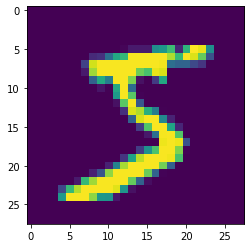

In [173]:
plt.imshow(X.values[0].reshape(28,28))

In [174]:
input_size = X.shape[1]
hidden_size=1024
ouput_size=y.shape[1]
layer=3
net = TwoLayer(input_size=input_size,hidden_size=hidden_size,output_size=output_size)

In [167]:
from datetime import datetime
x = datetime.now()
y_t = datetime.now()

In [179]:
pre = net.predict(X)
#곱하기는 빠른데 미분이 느리다.

## backpropagation
- 수치미분은 시간이 너무 오래걸림
- forward
- backward
- 곱하기랑 더하기
    - 곱하기 : 노드 바꿔주기
    - 더하기 : 1로
    - affine
        - foward : x * w (5,2) (2,3) => (5,3) 
        - backward : 돌려주려면 (5,3) (3,2) => (5,2)가 될 수 있다.
        - 2번의 transform 해주어야한다.
    - softmax
        - forward : t_k * log(y)
        - backward : (y_k - t_k)
    - relu
        - forward : where(x>0,x,0)
        - backward : where(x>0,1,0)
    - sigmoid
        - forward : 1/1+np.exp(-x)
        - backward : np.exp(x) / (1+np.exp(-x))^2 => 1/a(1-1/a) => sigmoid(1-sigmoid)
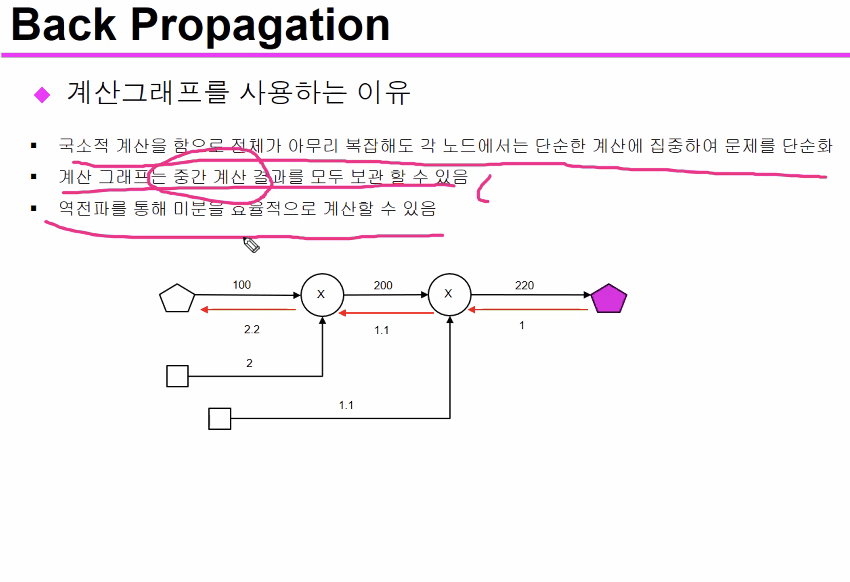

### Relu

In [187]:
class Relu:
    def __init__(self):
        self.x = None
        
    def forward(self,x):
        self.x = x
        dout = np.where(self.x>0,x,0)
        return dout
        
    def backward(self,dout):
        dx = dout * np.where(self.x>0,1,0)
        return dx


In [188]:
relu_net = Relu()
x = np.random.randn(5,3)
relu_net.forward(x)

array([[0.        , 0.        , 1.37297497],
       [0.        , 0.        , 1.12288154],
       [0.        , 0.        , 0.67648106],
       [0.        , 0.        , 0.        ],
       [0.65567178, 0.        , 1.02809041]])

In [189]:
relu_net.backward(dout=0.7)

array([[0. , 0. , 0.7],
       [0. , 0. , 0.7],
       [0. , 0. , 0.7],
       [0. , 0. , 0. ],
       [0.7, 0. , 0.7]])

In [178]:
%%time
epochs = 1
lr = 1e-3
net.fit(epochs,lr,X,y)
#수치미분 값 계산으로 너무 오래걸려서 멈춤

KeyboardInterrupt: 

In [ ]:
plt.plot(range(20),net.loss_val[:20])

In [142]:
class TwoLayer:
    #input_size
    #output_size
    #hidden = 2
    def __init__(self,input_size,hidden_size,output_size):
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size = hidden_size
        self.W = {}
        self.W['W1'] = np.random.randn(input_size,hidden_size)
        self.W['b1'] = np.random.randn(hidden_size)
        self.W['W2'] = np.random.randn(hidden_size,output_size)
        self.W['b2'] = np.random.randn(output_size)
        self.loss_val = []
        
    def predict(self,x):
        l1 = np.dot(x,self.W['W1']) + self.W['b1']
        z1 = relu(l1)
        
        l2 = np.dot(z1,self.W['W2']) + self.W['b2']
        out = softmax(l2)
        return out
    
    def loss(self,x,t):
        y = self.predict(x)
        return cross_entropy(y,t)
    
    def gradient(self,x,t):
        W1 = self.W['W1']
        W2 = self.W['W2']
        b1 = self.W['b1']
        b2 = self.W['b2']
        grads = {}
        f = lambda W : self.loss(x,t)
        grads['W1']=numerical_gradient(f,W1)
        grads['W2']=numerical_gradient(f,W2)
        grads['b1']=numerical_gradient(f,b1)
        grads['b2']=numerical_gradient(f,b2)
        return grads
    
    def acc(self,x,t):
        y = np.argmax(self.predict(x),axis=1) #가장 큰 값의 index return
        #2차원일 경우 정확한 index가 나오지 않는다.
        # 행에 대해서 적용을 시켜야한다. => axis=1
        t = np.argmax(t,axis=1)
        return np.sum(y == t) / t.shape[0] #true일때 1 이므로 맞은 갯수 / 전체갯수
        
        
    def fit(self,epochs,lr,x,t):
        for epoch in range(epochs):
            grads = self.gradient(x,t)
            self.W['W1'] -=lr * grads['W1']
            self.W['W2'] -=lr * grads['W2']
            self.W['b1'] -=lr * grads['b1']
            self.W['b2'] -=lr * grads['b2']
            print('='*10)
            print(f'{epoch+1} complete\n// loss = {self.loss(x,t)} // accuracy = {self.acc(x,t)}')
            self.loss_val.append(self.loss(x,t))
            print('='*10)
        
        